> ### <font color= "267372" >**PROYECTO 2**</font><font color= "1DA6A5" >_CLUSTERING</font>

##### <font color= "267372" >PASO 1. IMPORTAR EL ARCHIVO</font>


<font color= "1DA6A5" > - Se usarán las siguientes librerías para importarlo.</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium 
import numpy as np
from scipy import stats 

<font color= "1DA6A5" > - Se importa el archivo.</font>

In [3]:
df = pd.read_csv("201114COVID19MEXICO.csv",encoding= "ISO-8859-1")

In [4]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2020-11-14,20edd4,2,4,30,1,30,30,44,1,...,2,2,2,1,4,6,99,MÃ©xico,97,97
2604655,2020-11-14,3b9335,1,4,6,1,6,6,2,1,...,2,2,2,2,97,6,99,MÃ©xico,97,97
2604656,2020-11-14,1ef034,2,10,9,1,13,15,58,2,...,2,2,2,2,97,1,99,MÃ©xico,97,2
2604657,2020-11-14,2e7cc4,2,12,15,1,15,15,63,1,...,2,2,1,2,97,6,99,MÃ©xico,97,97


##### <font color= "267372" >PASO 2. ANÁLISIS DEL DATAFRAME</font>


In [5]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
df.shape

(2604659, 38)

In [7]:
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,UCI
count,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,...,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06
mean,1.653697e+00,9.305706e+00,1.497912e+01,1.485867e+00,1.593824e+01,1.521911e+01,3.572881e+01,1.152521e+00,8.273965e+01,2.574456e+00,...,2.275956e+00,2.140302e+00,2.272887e+00,2.224780e+00,1.239754e+01,1.083095e+00,9.638235e+00,5.268265e+00,9.860378e+01,8.276828e+01
std,4.757912e-01,3.632421e+00,8.130242e+00,4.998003e-01,9.908850e+00,8.069411e+00,4.663257e+01,3.595252e-01,3.396808e+01,8.118889e+00,...,5.301842e+00,5.230812e+00,5.261679e+00,5.427951e+00,3.073970e+01,2.760257e-01,2.630911e+01,1.899884e+00,6.195444e+00,3.392957e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,1.500000e+01,1.400000e+01,2.000000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.200000e+01,2.100000e+01,4.300000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

##### <font color= "267372" >PASO 3. ANÁLISIS DE DATOS Y LISTA DE ESTADÍSTICAS</font>

<font color= "1DA6A5" > - Análisis de datos.</font>

 0. FECHA_ACTUALIZACION
 1. ID_REGISTRO
 2. ORIGEN, rastreo de primeros síntomas. 
 3. SECTOR, sistema sanitario donde se ha tratado al paciente.
 4. ENTIDAD_UM,
 5. SEXO, femenino o masculino.
 6. ENTIDAD_NAC,  
 7. ENTIDAD_RES,
 8. MUNICIPIO_RES, municipio donde vive el paciente.
 9. TIPO_PACIENTE, ambulatorio, ingresado o no especificado.
 10. FECHA_INGRESO, 
 11. FECHA_SINTOMAS
 12.  FECHA_DEF
 13.  INTUBADO
 14.  NEUMONIA
 15.  EDAD   
 16.  NACIONALIDAD
 17.  EMBARAZO
 18.  HABLA_LENGUA_INDIG
 19.  INDIGENA 
 20.  DIABETES 
 21.  EPOC, enfermedad pulmonar. 
 22.  ASMA
 23.  INMUSUPR 
 24.  HIPERTENSION 
 25.  OTRA_COM
 26.  CARDIOVASCULAR
 27.  OBESIDAD
 28.  RENAL_CRONICA
 29.  TABAQUISMO
 30.  OTRO_CASO 
 31.  TOMA_MUESTRA
 32.  RESULTADO_LAB
 33.  CLASIFICACION_FINAL 
 34.  MIGRANTE  
 35.  PAIS_NACIONALIDAD, mexicano, extranjero o no especificado. 
 36.  PAIS_ORIGEN, en caso de ser extranjero   
 37.  UCI, si ha estado en la uci    

<font color= "1DA6A5" > - Listas estadísticas.</font>

- Media positivos.
- Media negativos.
- Porcentaje mujeres y hombres positivos,negativos o sin conclusión.
- Positivos con patologías previas.
- Edad de los positivos y negativos.
- Positivos o negativos que fumaban.
- Positivos o negativos embarazadas.
- Positivos o negativos por municipios.
- Positivos o negativos por nacionalidad.

##### <font color= "267372" >PASO 4. LISTA DE PREDICCIONES</font>

Prediccion 1. Positivo o no en base a si tiene patologías previas.

Prediccion 2. Si va a fallecer por coronavirus.

Prediccion 3. Si va a tener posibilidades de estar en la uci.

Prediccion 4. Si va a tener más posibilidades de cogerlo por el municipio en el que vives.

Prediccón 5. Segmentación de pacientes.

##### <font color= "267372" >**SECCIÓN 1**_PASO 3. RESUMEN DEL DATASET</font>

- **Data Set Characteristics:** Multivariado
- **Attribute Characteristics:** Categóricas, numéricas.
- **Associated Tasks:** 
- **Number of instances:** 2604659
- **Number of attributes:** 38
- **Missing values:** Sí.
- **Area:** salud.

##### <font color= "267372" >**SECCIÓN 1**_PASO 4. PLANTEAMIENTO DE PROBLEMA</font>

1. Tenemos un dataframe.
2. Análisis exploratorio de datos.
3. Limpiamos el dataframe para dejarlo preparado para el siguiente paso.
4. Hacemos un método clustering para conseguir grupos que nos den un comportamiento de las varibles para cada uno.
5. Posible regresión logística para conseguir una predicción, de lo ocupado, para un patrón determinado.

##### <font color= "267372" >**SECCIÓN 2**_PASO 1. OBTENER INFORMACIÓN</font>

<font color= "1DA6A5" > - Número de positivos.</font>

In [9]:
prueba = df.copy()

In [12]:
df["CLASIFICACION_FINAL"].value_counts(normalize=True*100)

7    0.469448
3    0.373688
6    0.125143
5    0.017384
1    0.011085
4    0.002849
2    0.000403
Name: CLASIFICACION_FINAL, dtype: float64

1. Confirmado
2. Confirmado
3. Confirmado 
4. Invalido por laboratorio
5. No realizado por laboratorio.
6. Sospechoso
7. Negativos.

In [10]:
# 1. Serían los positivos
# 2. Sin conclusiones todavía
# 3. Negativos por laboratorio.
prueba["CLASIFICACION_FINAL"] = prueba["CLASIFICACION_FINAL"].replace({1:1,2:1,3:1,4:2,5:2,6:2,7:3})

In [11]:
prueba["CLASIFICACION_FINAL"].value_counts()

3    1222753
1    1003253
2     378653
Name: CLASIFICACION_FINAL, dtype: int64

In [13]:
prueba["CLASIFICACION_FINAL"].value_counts(normalize=True*100)

3    0.469448
1    0.385176
2    0.145375
Name: CLASIFICACION_FINAL, dtype: float64

<font color= "1DA6A5" > - Número de defunciones.</font>

In [14]:
df["FECHA_DEF"].value_counts(normalize=True*100)

9999-99-99    9.464821e-01
2020-07-06    3.800881e-04
2020-07-07    3.766328e-04
2020-06-16    3.704900e-04
2020-07-13    3.678025e-04
                  ...     
2020-01-06    1.151782e-06
2020-01-05    7.678548e-07
2020-11-14    3.839274e-07
2020-01-04    3.839274e-07
2020-01-02    3.839274e-07
Name: FECHA_DEF, Length: 319, dtype: float64

In [15]:
import collections

collections.Counter(prueba["FECHA_DEF"] != "9999-99-99")

Counter({False: 2465263, True: 139396})

In [16]:
# 139396 fallecidos

<font color= "1DA6A5" > - Número de positivos en cada estado.</font>

In [17]:
prueba[prueba["CLASIFICACION_FINAL"]== 1]["ENTIDAD_NAC"].value_counts().sort_values(ascending=False)

9     190104
15     93920
11     52989
30     50260
19     48533
21     39307
14     37882
5      37578
26     37381
27     35110
24     33386
28     31613
20     30319
16     29996
12     28508
25     27810
31     23100
8      20815
10     19158
13     17582
32     15308
2      14886
22     11447
7      11339
1      10466
29      9404
3       8772
18      7610
17      7314
4       6336
23      6290
6       5299
99      3431
Name: ENTIDAD_NAC, dtype: int64

<font color= "1DA6A5" > - Los nombres de los 3 estados con mayor número de positivos.</font>

In [18]:
prueba[prueba["CLASIFICACION_FINAL"]== 1]["ENTIDAD_NAC"].value_counts().sort_values(ascending=False).head(3)
# 9. Ciudad de mexico
# 15. Mexico.
# 11. Guanajuato.

9     190104
15     93920
11     52989
Name: ENTIDAD_NAC, dtype: int64

<font color= "1DA6A5" > - Edad promedio de los positivos.</font>

In [19]:
prueba[prueba["CLASIFICACION_FINAL"]== 1]["EDAD"].mean()

44.323492678317436

<font color= "1DA6A5" > - Edad promedio de los que han fallecido.</font>

In [20]:
prueba[prueba["FECHA_DEF"] != "9999-99-99"]["EDAD"].mean()

62.273185744210735

<font color= "1DA6A5" > - Tiempo entre la columna FECHA_SINTOMA y la columna FECHA_DEF para los que han fallecido.</font>

In [21]:
# Cambiar las columnas de fecha a formato fecha.

In [22]:
df_fechas = df.copy()

In [23]:
df_fechas = df_fechas[['FECHA_SINTOMAS','FECHA_DEF',]]

In [24]:
df_fechas["FALLECIDOS"] = prueba["FECHA_DEF"].map(lambda x: 0 if x=="9999-99-99" else 1)

In [25]:
# prueba["FALLECIDOS"] = prueba["FECHA_DEF"].map(lambda x: 0 if x=="9999-99-99" else 1)

In [26]:
#Cambiar a formato fecha: 
df_fechas["FECHA_SINTOMAS"] = pd.to_datetime(df_fechas["FECHA_SINTOMAS"], format="%Y-%m-%d")

In [27]:
df_fechas_muertos = df_fechas[df_fechas["FALLECIDOS"]==1] 

In [28]:
df_fechas_muertos

,FECHA_SINTOMAS,FECHA_DEF,FALLECIDOS
2,2020-03-26,2020-03-30,1
3,2020-03-28,2020-04-02,1
6,2020-03-25,2020-04-05,1
9,2020-03-27,2020-03-31,1
17,2020-03-23,2020-04-05,1
...,...,...,...
2604249,2020-10-07,2020-10-23,1
2604287,2020-10-15,2020-10-22,1
2604459,2020-10-01,2020-10-20,1
2604469,2020-10-12,2020-10-12,1


In [29]:
df_fechas_muertos["FECHA_DEF"]= pd.to_datetime(df_fechas_muertos["FECHA_DEF"], format="%Y-%m-%d")

<ipython-input-29-16446a4654f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas_muertos["FECHA_DEF"]= pd.to_datetime(df_fechas_muertos["FECHA_DEF"], format="%Y-%m-%d")


In [30]:
# Restar fechas

In [31]:
df_fechas_muertos["Tiempo hasta muerte"] = df_fechas_muertos["FECHA_DEF"] - df_fechas_muertos["FECHA_SINTOMAS"]

<ipython-input-31-a01b894bcf31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas_muertos["Tiempo hasta muerte"] = df_fechas_muertos["FECHA_DEF"] - df_fechas_muertos["FECHA_SINTOMAS"]


In [32]:
df_fechas_muertos

,FECHA_SINTOMAS,FECHA_DEF,FALLECIDOS,Tiempo hasta muerte
2,2020-03-26,2020-03-30,1,4 days
3,2020-03-28,2020-04-02,1,5 days
6,2020-03-25,2020-04-05,1,11 days
9,2020-03-27,2020-03-31,1,4 days
17,2020-03-23,2020-04-05,1,13 days
...,...,...,...,...
2604249,2020-10-07,2020-10-23,1,16 days
2604287,2020-10-15,2020-10-22,1,7 days
2604459,2020-10-01,2020-10-20,1,19 days
2604469,2020-10-12,2020-10-12,1,0 days


<font color= "1DA6A5" > - ¿Cuál es la enfermedad con más prevalencia en los positivos y en los que han fallecido?</font>

In [33]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [34]:
lista_enfermedades = ['NEUMONIA','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for i in lista_enfermedades:
    print(i)
    print(collections.Counter(prueba[prueba["CLASIFICACION_FINAL"]== 1][i]))
    print("***"*10)

NEUMONIA
Counter({2: 834258, 1: 168986, 99: 9})
******************************
DIABETES
Counter({2: 851952, 1: 147867, 98: 3434})
******************************
EPOC
Counter({2: 986562, 1: 13464, 98: 3227})
******************************
ASMA
Counter({2: 974941, 1: 25135, 98: 3177})
******************************
INMUSUPR
Counter({2: 989674, 1: 10230, 98: 3349})
******************************
HIPERTENSION
Counter({2: 811907, 1: 188107, 98: 3239})
******************************
CARDIOVASCULAR
Counter({2: 981305, 1: 18672, 98: 3276})
******************************
OBESIDAD
Counter({2: 828835, 1: 171303, 98: 3115})
******************************
RENAL_CRONICA
Counter({2: 982051, 1: 17989, 98: 3213})
******************************
TABAQUISMO
Counter({2: 926487, 1: 73385, 98: 3381})
******************************


In [35]:
#Gana hipertension.

In [36]:
lista_enfermedades = ['NEUMONIA','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for i in lista_enfermedades:
    print(i)
    print(collections.Counter(prueba[prueba["FALLECIDOS"]== 1][i]))
    print("***"*10)

NEUMONIA
Counter({1: 96732, 2: 41912, 99: 752})
******************************
DIABETES
Counter({2: 85186, 1: 53143, 98: 1067})
******************************
EPOC
Counter({2: 131077, 1: 7302, 98: 1017})
******************************
ASMA
Counter({2: 135776, 1: 2625, 98: 995})
******************************
INMUSUPR
Counter({2: 133968, 1: 4368, 98: 1060})
******************************
HIPERTENSION
Counter({2: 76406, 1: 61973, 98: 1017})
******************************
CARDIOVASCULAR
Counter({2: 130173, 1: 8183, 98: 1040})
******************************
OBESIDAD
Counter({2: 107659, 1: 30770, 98: 967})
******************************
RENAL_CRONICA
Counter({2: 126889, 1: 11508, 98: 999})
******************************
TABAQUISMO
Counter({2: 126679, 1: 11687, 98: 1030})
******************************


In [37]:
# Gana hipertensión.

##### <font color= "267372" >**SECCIÓN 2**_PASO 1. GRÁFICAS</font>

<font color= "1DA6A5" > - Gráfica de barras del número de hombres y mujeres. </font>

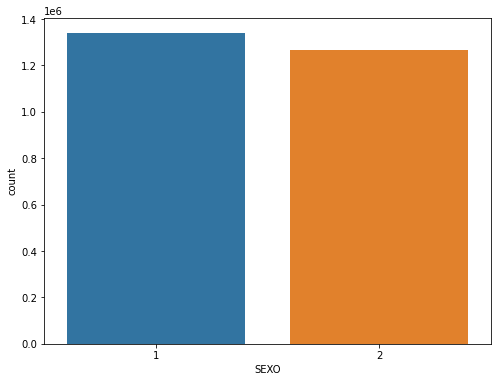

In [38]:
# De los positivos cuántos son hombres y cuántas mujeres.
# 1. Mujer
# 2. Hombre
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x="SEXO",data = prueba)
plt.show()

<font color= "1DA6A5" > - Grafica de barras de los positivos y no positivos </font>

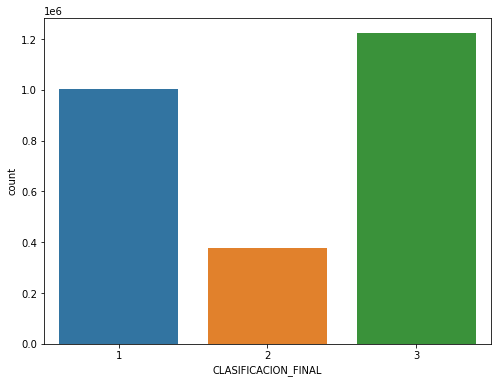

In [39]:
# 1. Serían los positivos
# 2. Sin conclusiones todavía
# 3. Negativos por laboratorio.

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x="CLASIFICACION_FINAL",data = prueba)
plt.show()

<font color= "1DA6A5" > - Gráfica de barras del número de positivos por estado. </font>

C:\Users\nuria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


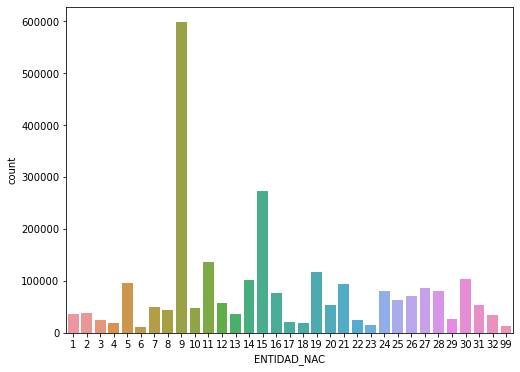

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(prueba["ENTIDAD_NAC"], data=prueba[prueba["CLASIFICACION_FINAL"]== 1])
plt.show()


<font color= "1DA6A5" > - Gráfica de barras del número de positivos por la columna SECTOR </font>

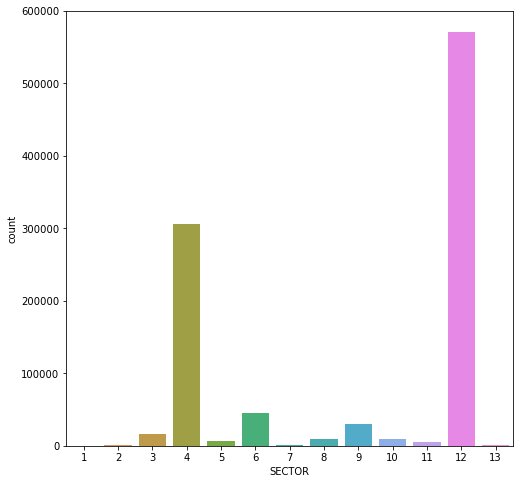

In [41]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x="SECTOR",data = prueba[prueba["CLASIFICACION_FINAL"]==1])
plt.show()

<font color= "1DA6A5" > - Histograma de la edad de los positivos. </font>

(array([1.43900e+04, 7.18040e+04, 2.52379e+05, 2.57672e+05, 2.16143e+05,
        1.23746e+05, 5.38790e+04, 1.25900e+04, 6.15000e+02, 3.50000e+01]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

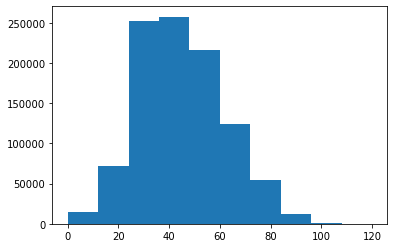

In [42]:
plt.hist(prueba[prueba["CLASIFICACION_FINAL"]==1].EDAD)

<font color= "1DA6A5" > - Histograma de la edad de los no positivos. </font>

(array([4.69330e+04, 1.33544e+05, 3.65131e+05, 3.08877e+05, 2.18364e+05,
        9.88530e+04, 3.93590e+04, 1.09120e+04, 7.26000e+02, 5.40000e+01]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

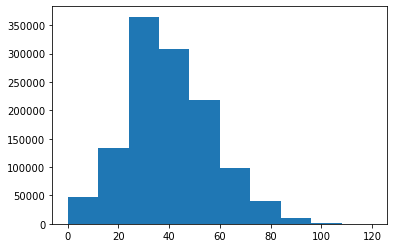

In [43]:
plt.hist(prueba[prueba["CLASIFICACION_FINAL"]==3].EDAD)

<font color= "1DA6A5" > - Mapa de calor de México con el número de positivos por estado utilizando folium. </font>

In [44]:
positivos_prueba = prueba[prueba["CLASIFICACION_FINAL"]==1]

In [45]:
positivos_prueba[["CLASIFICACION_FINAL","ENTIDAD_NAC"]]

,CLASIFICACION_FINAL,ENTIDAD_NAC
0,1,21
1,1,15
2,1,9
3,1,15
4,1,15
...,...,...
2604469,1,21
2604517,1,26
2604538,1,29
2604545,1,11


In [46]:
len(positivos_prueba.ENTIDAD_NAC.unique())

33

In [47]:
positivos = positivos_prueba.groupby("ENTIDAD_NAC")["CLASIFICACION_FINAL"].sum()

In [48]:
mexico_geo = r'mexico22.json'
latitude = 23.6260
longitude = -102.5375

mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5)

mexico_map.choropleth(
    geo_data=mexico_geo,
    data=positivos,
    columns=["ENTIDAD_NAC","CLASIFICACION_FINAL"],
   key_on='feature.properties.name',
     fill_color='Reds', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Positivos en Mexico'
)
mexico_map


C:\Users\nuria\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<font color= "1DA6A5" > - Mapa de calor de México con el número de fallecidos por estado utilizando folium. </font>

In [49]:
fallecidos = prueba[prueba["FALLECIDOS"]==1]

In [50]:
fallecidos = fallecidos.groupby("ENTIDAD_NAC")["FALLECIDOS"].sum()

In [51]:
mexico_geo = r'mexico22.json'
latitude = 23.6260
longitude = -102.5375

mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5)

mexico_map.choropleth(
    geo_data=mexico_geo,
    data=fallecidos,
    columns=["ENTIDAD_NAC","FALLECIDOS"],
   key_on='feature.properties.name',
     fill_color='Reds', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Fallecidos en Mexico'
)
mexico_map


C:\Users\nuria\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


##### <font color= "267372" >**SECCIÓN 3**_PASO 1. PLANTEAMIENTO DEL PROBLEMA</font>

##### <font color= "267372" >PREPROCESAMIENTO DE DATOS</font>

<font color= "1DA6A5" > - Eliminamos columnas que no necesitamos. </font>

In [52]:
df_corona = df.copy()

In [53]:
#Tenemos claro borrar las siguientes:
df_corona.drop(['FECHA_ACTUALIZACION', 'ID_REGISTRO'], axis=1, inplace=True)

In [54]:
df_corona.drop(['ENTIDAD_NAC', 'MUNICIPIO_RES','PAIS_NACIONALIDAD', 'PAIS_ORIGEN'], axis=1,inplace=True)

<font color= "1DA6A5" > - Columna Clasificación final la agrupamos en Si, No. </font>

In [55]:
# 1. Serían los positivos
# 2. Sin conclusiones todavía
# 0. Negativos por laboratorio.
df_corona["CLASIFICACION_FINAL"] = df_corona["CLASIFICACION_FINAL"].replace({1:1,2:1,3:1,4:2,5:2,6:2,7:0})

In [56]:
df_corona = df_corona[(df_corona["CLASIFICACION_FINAL"]==1) | (df_corona["CLASIFICACION_FINAL"]==0)]

<font color= "1DA6A5" > - Quitamos columna Entidad_UM </font>

In [57]:
df_corona.drop("ENTIDAD_UM", axis=1, inplace=True)

<font color= "1DA6A5" > - Quitamos columna ORIGEN, 'HABLA_LENGUA_INDIG', 'RESULTADO_LAB', 'MIGRANTE' </font>

In [58]:
df_corona.drop(["ORIGEN", 'HABLA_LENGUA_INDIG', 'RESULTADO_LAB', 'MIGRANTE'], axis=1, inplace=True)

<font color= "1DA6A5" > - Quitamos columna TOMA_MUESTRA.</font>

In [59]:
df_corona.drop("TOMA_MUESTRA", axis=1, inplace=True)

<font color= "1DA6A5" > - Quitamos columna FECHA_DEF y hacemos una nueva de fallecidos y no fallecidos.</font>

In [60]:
df_corona["FALLECIDOS"] = df_corona["FECHA_DEF"].map(lambda x: 0 if x=="9999-99-99" else 1)

In [61]:
df_corona.drop("FECHA_DEF", axis=1, inplace=True)

<font color= "1DA6A5" > - Quitamos columna "FECHA_INGRESO", "FECHA_SINTOMAS" y hacemos una nueva de fallecidos y no fallecidos.</font>

In [62]:
df_corona.drop(["FECHA_INGRESO", "FECHA_SINTOMAS"], axis=1, inplace=True)

In [63]:
df_corona

,SECTOR,SEXO,ENTIDAD_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,INDIGENA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,FALLECIDOS
0,9,2,21,1,97,2,75,1,97,2,...,2,2,1,2,2,2,2,1,97,0
1,4,1,5,1,97,2,47,1,2,2,...,2,2,2,2,2,2,1,1,97,0
2,4,2,9,2,2,1,58,1,97,2,...,1,2,2,2,1,2,99,1,1,1
3,4,2,15,2,2,1,49,1,97,2,...,2,2,2,2,2,2,99,1,2,1
4,12,1,15,1,97,2,27,1,2,2,...,2,2,2,2,2,2,1,1,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604469,6,2,15,2,1,1,65,1,97,2,...,98,98,98,98,98,98,2,1,2,1
2604517,12,2,26,1,97,2,29,1,97,2,...,2,2,2,2,2,2,1,1,97,0
2604538,6,1,15,2,1,1,62,1,2,2,...,1,2,2,2,2,2,2,1,2,1
2604545,10,2,15,2,2,2,68,1,97,2,...,2,2,2,2,2,2,2,1,2,0


<font color= "1DA6A5" > - Quitar filas con .</font>

In [65]:
for i in lista_enfermedades:
    df_corona[i] = df_corona[i].map(lambda x: np.nan if x>2 else x)

In [66]:
for i in df_corona[["INTUBADO","EMBARAZO"]]:
    df_corona[i] = df_corona[i].map(lambda x: np.nan if x>2 else x)

In [67]:
df_corona.isnull().sum()

SECTOR                       0
SEXO                         0
ENTIDAD_RES                  0
TIPO_PACIENTE                0
INTUBADO               1880850
NEUMONIA                  6813
EDAD                         0
NACIONALIDAD                 0
EMBARAZO               1086823
INDIGENA                     0
DIABETES                  7135
EPOC                      6636
ASMA                      6540
INMUSUPR                  6956
HIPERTENSION              6700
OTRA_COM                     0
CARDIOVASCULAR            6642
OBESIDAD                  6335
RENAL_CRONICA             6540
TABAQUISMO                6929
OTRO_CASO                    0
CLASIFICACION_FINAL          0
UCI                          0
FALLECIDOS                   0
dtype: int64

In [68]:
df_corona.dropna(axis=0, thresh=20, inplace = True) #Si la fila tiene al menos 2 no-NaN se mantiene
df_corona.shape

(2219573, 24)

<font color= "1DA6A5" > - Sustituimos nans por la moda.</font>

In [69]:
modas = []
for i in lista_enfermedades:
    print(i)
    print(df_corona[i].value_counts())
    print(stats.mode(df_corona[i]))
    modas.append(stats.mode(df_corona[i][0]))
    print("****"*5)

NEUMONIA
2.0    1965881
1.0     246890
Name: NEUMONIA, dtype: int64
ModeResult(mode=array([2.]), count=array([1965881]))
********************
DIABETES
2.0    1958876
1.0     259491
Name: DIABETES, dtype: int64
ModeResult(mode=array([2.]), count=array([1958876]))
********************
EPOC
2.0    2191985
1.0      27105
Name: EPOC, dtype: int64
ModeResult(mode=array([2.]), count=array([2191985]))
********************
ASMA
2.0    2157266
1.0      61948
Name: ASMA, dtype: int64
ModeResult(mode=array([2.]), count=array([2157266]))
********************
INMUSUPR
2.0    2193475
1.0      25355
Name: INMUSUPR, dtype: int64
ModeResult(mode=array([2.]), count=array([2193475]))
********************
HIPERTENSION
2.0    1872656
1.0     346201
Name: HIPERTENSION, dtype: int64
ModeResult(mode=array([2.]), count=array([1872656]))
********************
CARDIOVASCULAR
2.0    2179180
1.0      39940
Name: CARDIOVASCULAR, dtype: int64
ModeResult(mode=array([2.]), count=array([2179180]))
********************
OB

In [70]:
lista_enfermedades = ['NEUMONIA','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', "INTUBADO","EMBARAZO"]

In [71]:
for i in lista_enfermedades:
    df_corona[i] = df_corona[i].replace(np.nan,2).astype("int64")

In [72]:
for i in df_corona[["OTRO_CASO","UCI"]]:
    print(i)
    print(df_corona[i].value_counts())
    print(stats.mode(df_corona[i]))
    print("****"*5)

OTRO_CASO
1     1058024
2      947131
99     214418
Name: OTRO_CASO, dtype: int64
ModeResult(mode=array([1], dtype=int64), count=array([1058024]))
********************
UCI
97    1869944
2      314789
1       28497
99       6343
Name: UCI, dtype: int64
ModeResult(mode=array([97], dtype=int64), count=array([1869944]))
********************


In [73]:
df_corona["UCI"] = df_corona["UCI"].map(lambda x: 2 if x>3 else x)

In [74]:
df_corona["OTRO_CASO"] = df_corona["OTRO_CASO"].map(lambda x: 2 if x>3 else x)

In [75]:
lista_cambios = ['SEXO','TIPO_PACIENTE', 'INTUBADO',
       'NEUMONIA','NACIONALIDAD', 'EMBARAZO', 'INDIGENA', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
        'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'CLASIFICACION_FINAL', 'UCI']

In [76]:
for i in lista_cambios:
    df_corona[i] = df_corona[i].map(lambda x: 0 if x==2 else x)

<font color= "1DA6A5" > - Hacemos binning y dummies de la columna EDAD.</font>

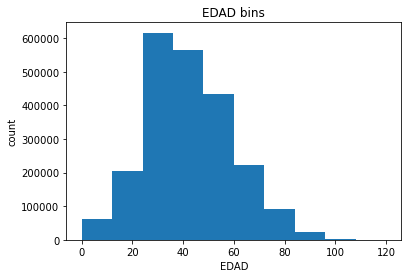

In [77]:
plt.hist(df_corona["EDAD"])
plt.xlabel("EDAD")
plt.ylabel("count")
plt.title("EDAD bins")
plt.show()

In [78]:
categorias = ["0-30","30-60","60-90","90-120"]

In [79]:
bins = np.linspace(min(df["EDAD"]), max(df["EDAD"]), 5)
bins

array([  0.,  30.,  60.,  90., 120.])

In [80]:
df_corona['EDAD-binned'] = pd.cut(df_corona['EDAD'], bins, labels=categorias, include_lowest=True )
df_corona.head(5)

,SECTOR,SEXO,ENTIDAD_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,INDIGENA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,FALLECIDOS,EDAD-binned
0,9,0,21,1,0,0,75,1,0,0,...,0,1,0,0,0,0,1,0,0,60-90
1,4,1,5,1,0,0,47,1,0,0,...,0,0,0,0,0,1,1,0,0,30-60
2,4,0,9,0,0,1,58,1,0,0,...,0,0,0,1,0,0,1,1,1,30-60
3,4,0,15,0,0,1,49,1,0,0,...,0,0,0,0,0,0,1,0,1,30-60
4,12,1,15,1,0,0,27,1,0,0,...,0,0,0,0,0,1,1,0,0,0-30


In [81]:
dummy_edad = pd.get_dummies(df_corona["EDAD-binned"]) 

In [85]:
dummy_edad

,0-30,30-60,60-90,90-120
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
2604459,0,1,0,0
2604517,1,0,0,0
2604538,0,0,1,0
2604545,0,0,1,0


In [93]:
df_corona = pd.concat([df_corona1,dummy_edad.drop("90-120",axis=1)],axis=1)

In [96]:
df_corona = df_corona.drop(["EDAD-binned","EDAD"],axis=1)

In [125]:
df_corona.to_csv("DataFrame_CoronaVirus_Limpio.csv")

# Utilizamos KModes: clustering para agrupaciones mixtas o esclusivamente categóricas

### .<font color='papayawhip'>Diseñado para agrupar grandes conjuntos de datos categóricos,  tiene como objetivo obtener las k modas que representan al conjunto.</font>

 ### Búsqueda del Cluster adecuado.

In [75]:
cost = []
for i in list(range(1,5)):
    kmode = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9428632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 224401, cost: 8620229.0
Run 1, iteration: 2/100, moves: 72990, cost: 8600903.0
Run 1, iteration: 3/100, moves: 3314, cost: 8600903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 230636, cost: 8406679.0
Run 1, iteration: 2/100, moves: 111832, cost: 8393627.0
Run 1, iteration: 3/100, moves: 15205, cost: 8393627.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 863248, cost: 7192790.0
Run 1, iteration: 2/100, moves: 74837, cost: 7192790.0


## Obtenemos el codo, que nos indica que el valor oscila entre dos y tres aproximadamente

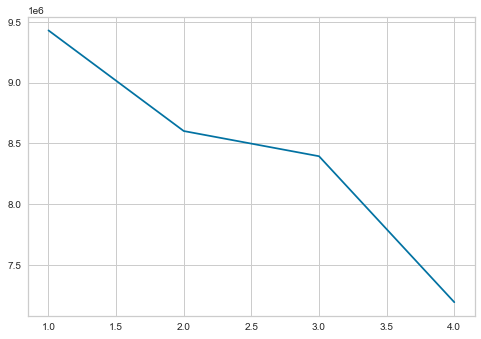

In [76]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

### Elegimos Kmodes =  3

In [115]:
import numpy as np
from kmodes.kmodes import KModes

# Todo el DataFrame es Categórico. Utilizamos el KModes para obtener una aproximación de los centroides.

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df, categorical= len(df.columns))

# Imprimimos los clusters: centroides
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 908339, cost: 7607758.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 733623, cost: 7890210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 717283, cost: 7666970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 564201, cost: 7793407.0
Run 4, iteration: 2/100, moves: 336546, cost: 7788483.0
Run 4, iteration: 3/100, moves: 90519, cost: 7788483.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 736447, cost: 7305449.0
Best run was number 5
[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### Obtenemos los centroides

In [132]:
clusters

array([1, 0, 2, ..., 2, 2, 2], dtype=uint16)

In [133]:
Centroides2 = pd.DataFrame(km.cluster_centroids_)
Centroides2.columns = df.columns

In [134]:
Centroides2

,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
df3 = df.copy().reset_index()

### Agrupamos los clusters con nuestro dataframe

In [135]:
clustersDf3 = pd.DataFrame(clusters)
clustersDf3.columns = ['cluster_predicted3']
combinedDf3 = pd.concat([df3, clustersDf3], axis = 1).reset_index()
combinedDf3

,level_0,index,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit,cluster_predicted3
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,4,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219568,2219568,2219568,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219569,2219569,2219569,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2219570,2219570,2219570,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219571,2219571,2219571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


### Limpiamos el nuevo DataFrame

In [136]:
combinedDf3 = combinedDf3.drop(['index', 'level_0'], axis = 1)

### Obtenemos el Dataframe final a falta de etiquetar y definir los grupos

In [148]:
combinedDf3

,SEXO,TIPO_PACIENTE,NACIONALIDAD,INDIGENA,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,0-30,30-60,60-90,CLASIFICACION_FINAL,UCI,FALLECIDOS,Puebla,Coahuila De Zaragoza,Ciudad De México,Estado De México,Baja California Sur,Colima,Jalisco,Quintana Roo,Guanajuato,Sonora,Durango,Tlaxcala,Baja California,Michoacán De Ocampo,Aguascalientes,Tamaulipas,Zacatecas,Chihuahua,Guerrero,Veracruz De Ignacio De La Llave,Sinaloa,Querétaro,Yucatán,Hidalgo,San Luis Potosí,Tabasco,Nuevo León,Chiapas,Morelos,Campeche,Oaxaca,Nayarit,cluster_predicted3
0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219568,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219569,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2219570,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2219571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


###  Copias de seguridad por si la lio ( que suele pasar a menudo)

In [149]:
combinedDf3.to_csv("DF_Etiquetas_K=3.csv")

In [176]:
cluster_03 = combinedDf3[combinedDf3['cluster_predicted3'] == 0].mean()
cluster_13 = combinedDf3[combinedDf3['cluster_predicted3'] == 1].mean()
cluster_23 = combinedDf3[combinedDf3['cluster_predicted3'] == 2].mean()
globales

In [147]:
AgrupacionFinal3.to_csv("Etiquetas_K=3.csv")

### Obtenemos las medias de cada cluster comparándolo con las globales. Únicamente para poder rdefinir nuestros grupos.

In [198]:
AgrupacionFinal3 = pd.concat([cluster_03, cluster_12,cluster_23, globales ], axis = 1).reset_index()


In [199]:
AgrupacionFinal3.columns = ["Atributos","Pacientes sanos Adultos / mayores -Ambulatorios-","Pacientes sanos Jóvenes -Ambulatorios-","Grupo de riesgo -Hospitalizados-", "Datos Globales"]


In [200]:
AgrupacionFinal3

,Atributos,Pacientes sanos Adultos / mayores -Ambulatorios-,Pacientes sanos Jóvenes -Ambulatorios-,Grupo de riesgo -Hospitalizados-,Datos Globales
0,SEXO,0.676105,0.244455,0.251796,0.515430
1,TIPO_PACIENTE,0.970704,0.753828,0.339790,0.842479
2,NACIONALIDAD,0.995329,0.995375,0.997072,0.995311
3,INDIGENA,0.008830,0.012248,0.015045,0.010613
4,INTUBADO,0.001384,0.037416,0.103867,0.021207
5,NEUMONIA,0.015491,0.174231,0.518684,0.111233
6,EMBARAZO,0.007128,0.004199,0.002318,0.008746
7,DIABETES,0.099127,0.147781,0.267856,0.116910
8,EPOC,0.008154,0.015669,0.031829,0.012212
9,ASMA,0.029842,0.022231,0.019820,0.027910


In [151]:
combinedDf3.columns

Index(['SEXO', 'TIPO_PACIENTE', 'NACIONALIDAD', 'INDIGENA', 'INTUBADO',
       'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', '0-30', '30-60', '60-90',
       'CLASIFICACION_FINAL', 'UCI', 'FALLECIDOS', 'Puebla',
       'Coahuila De Zaragoza', 'Ciudad De México', 'Estado De México',
       'Baja California Sur', 'Colima', 'Jalisco', 'Quintana Roo',
       'Guanajuato', 'Sonora', 'Durango', 'Tlaxcala', 'Baja California',
       'Michoacán De Ocampo', 'Aguascalientes', 'Tamaulipas', 'Zacatecas',
       'Chihuahua', 'Guerrero', 'Veracruz De Ignacio De La Llave', 'Sinaloa',
       'Querétaro', 'Yucatán', 'Hidalgo', 'San Luis Potosí', 'Tabasco',
       'Nuevo León', 'Chiapas', 'Morelos', 'Campeche', 'Oaxaca', 'Nayarit',
       'cluster_predicted3'],
      dtype='object')

# Graficamos para observar el global de pacientes por porsitivo según el cluster_predicted

#### El grupo 0 presenta el mayor número de positivos, pero también es la muestra de mayor tamaño agrupada. En su mayoría son pacientes ambulatorios de edad media que gozan de buena salud. A pesar de haberse contagiado, no existe un número elevado de fallecidos

#### El grupo 1 se conforma por gente joven y sana en un 90%. La muestra es inferior en tamaño a la del grupo 0 ya que el intervalo de edades no es tan acusado. Además, nos encontramos en un modelo demográfico cada vez más regresivo.

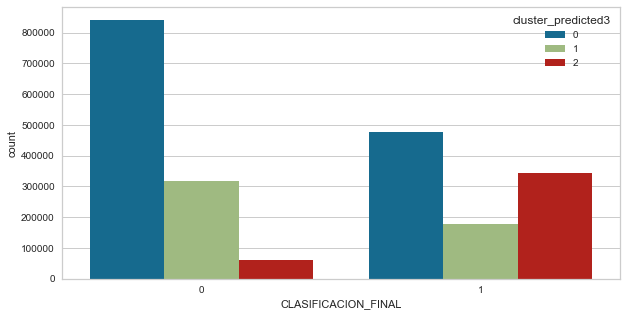

In [180]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['CLASIFICACION_FINAL'],order=combinedDf3["CLASIFICACION_FINAL"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

# Grupo 2

### Se observa que el número de fallecidos más alto se encuentra en el grupo 2

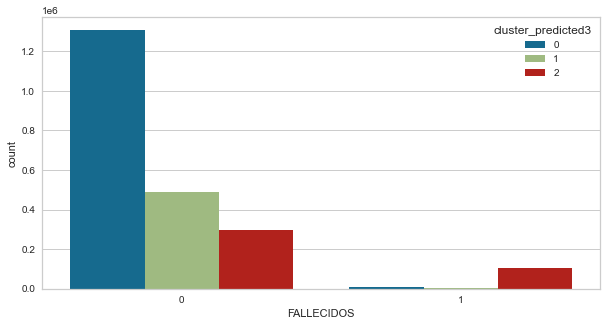

In [182]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['FALLECIDOS'],order=combinedDf3["FALLECIDOS"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

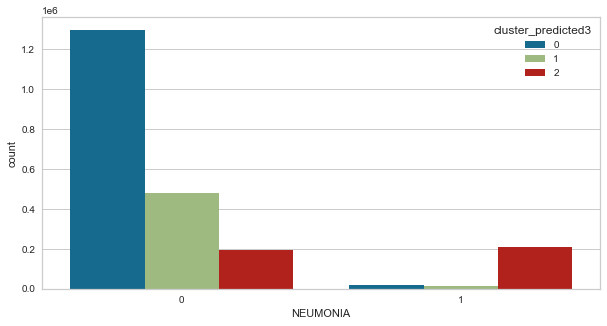

In [202]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['NEUMONIA'],order=combinedDf3["NEUMONIA"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

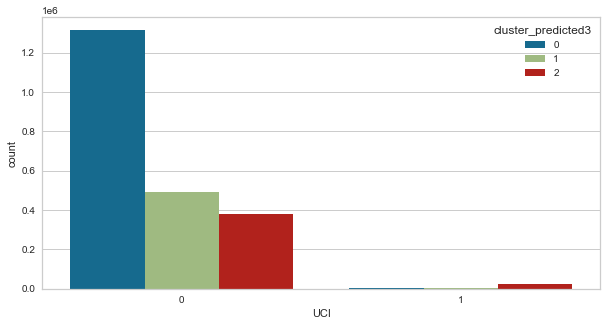

In [204]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['UCI'],order=combinedDf3["UCI"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()

### Los pertenecientes al grupo 2 son los que más tiempo han pasado hospitalizados

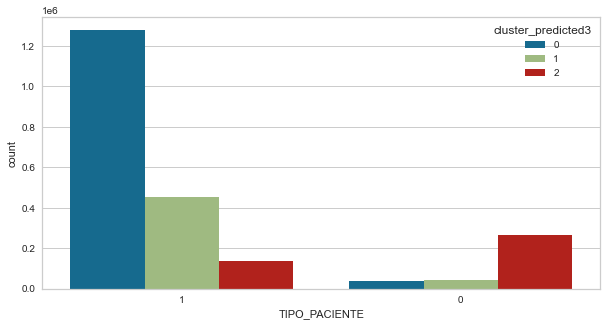

In [205]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['TIPO_PACIENTE'],order=combinedDf3["TIPO_PACIENTE"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()


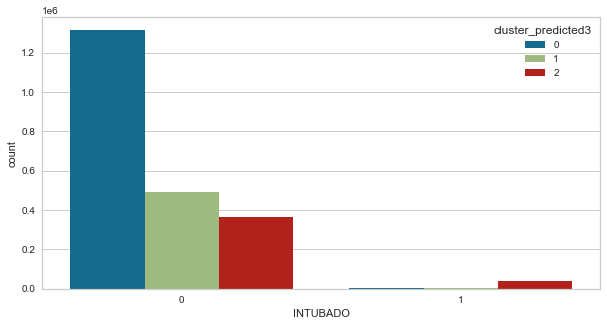

In [206]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf3['INTUBADO'],order=combinedDf3["INTUBADO"].value_counts().index,hue=combinedDf3['cluster_predicted3'])
plt.show()